### Import

In [30]:
from sklearn.model_selection import train_test_split
import os
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold


### Preprocessing

In [31]:

def preprocess_image(file_path, label, target_size=(128, 128)):
    img = load_img(file_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0  
    label = int(label)  
    return img_array, label


dataset_path = 'dataset'

classes = os.listdir(dataset_path)

file_paths = []
labels = []


for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    

    class_files = [os.path.join(class_path, file) for file in os.listdir(class_path)]
   
    file_paths.extend(class_files)
    labels.extend([class_name] * len(class_files))


class_to_label = {class_name: i for i, class_name in enumerate(classes)}
labels = [class_to_label[label] for label in labels]


X_train, X_test, y_train, y_test = train_test_split(
    file_paths, labels, test_size=0.2, random_state=42)

X_train_processed = [preprocess_image(file_path, label) for file_path, label in zip(X_train, y_train)]
X_test_processed = [preprocess_image(file_path, label) for file_path, label in zip(X_test, y_test)]


X_train_features, y_train_labels = zip(*X_train_processed)
X_test_features, y_test_labels = zip(*X_test_processed)


y_train_encoded = to_categorical(y_train_labels)
y_test_encoded = to_categorical(y_test_labels)


### Primo modello

In [26]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


num_classes = len(classes)
model.add(Dense(num_classes, activation='softmax'))


y_train_encoded = to_categorical(y_train_labels, num_classes=num_classes)
y_test_encoded = to_categorical(y_test_labels, num_classes=num_classes)



X_train_features = np.array(X_train_features)
X_test_features = np.array(X_test_features)


input_shape = model.input_shape[1:] 
X_train_features = X_train_features.reshape((-1,) + input_shape)
X_test_features = X_test_features.reshape((-1,) + input_shape)

y_train_encoded = np.array(y_train_encoded)
y_test_encoded = np.array(y_test_encoded)



hystory = model.fit(X_train_features, y_train_encoded, epochs=64, batch_size=32, verbose=1)

test_loss, test_accuracy = model.evaluate(X_test_features, y_test_encoded)

43/43 [==============================] - 1s 25ms/step - loss: 2.1675 - accuracy: 0.2775


43/43 [==============================] - 1s 26ms/step


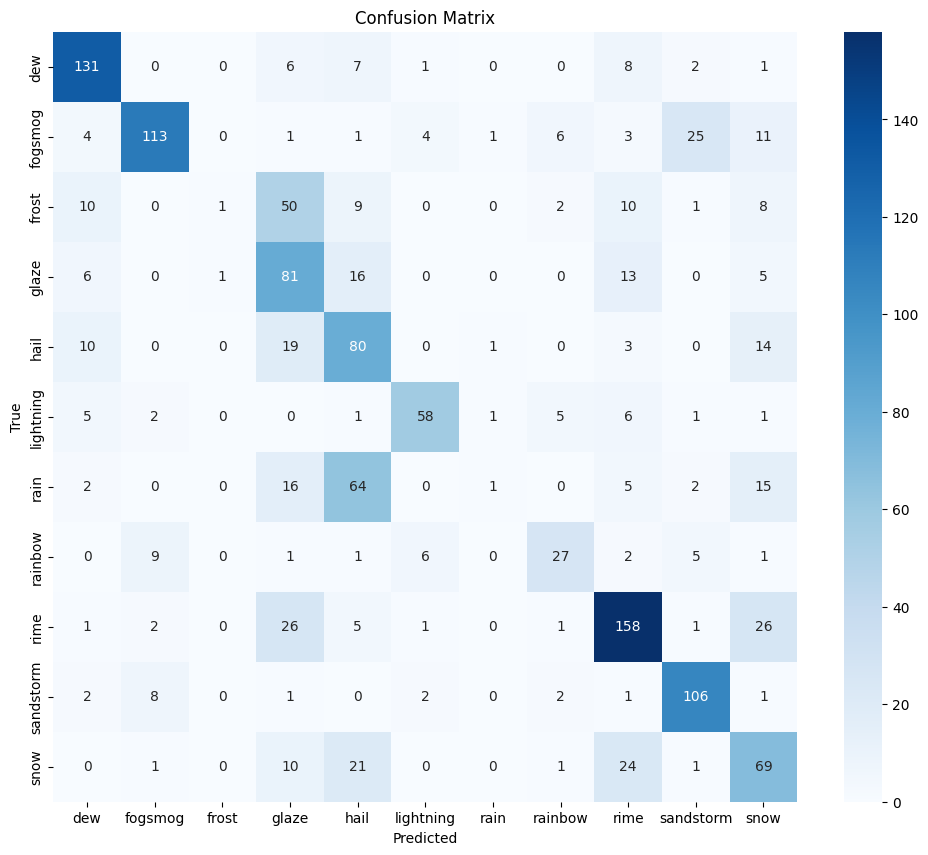

In [7]:

y_pred = model.predict(X_test_features)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)


conf_mat = confusion_matrix(y_true_classes, y_pred_classes)


plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [47]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 128)      

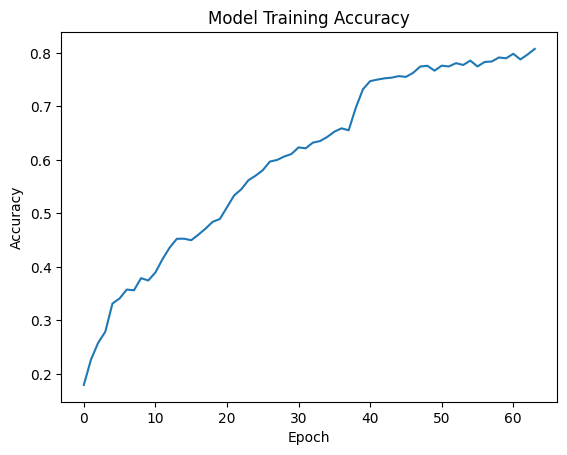

In [5]:

plt.plot(hystory.history['accuracy'])
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


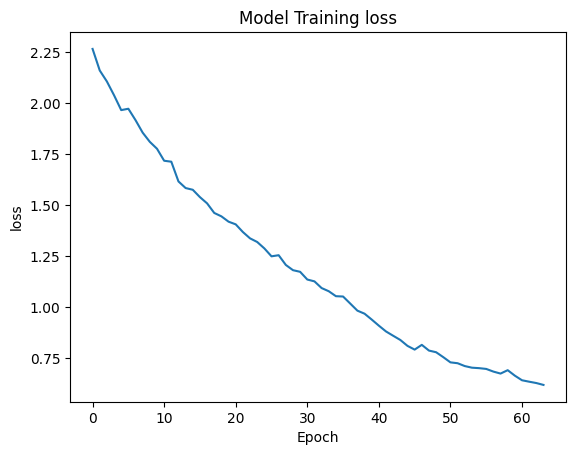

In [49]:

plt.plot(hystory.history['loss'])
plt.title('Model Training loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()


### Secondo Modello

In [15]:

model_2 = Sequential()


model_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D((2, 2)))


model_2.add(Flatten())


model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.5))


model_2.add(Dense(num_classes, activation='softmax'))


model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


num_classes = len(classes)
model_2.add(Dense(num_classes, activation='softmax'))


y_train_encoded = to_categorical(y_train_labels, num_classes=num_classes)
y_test_encoded = to_categorical(y_test_labels, num_classes=num_classes)


X_train_features = np.array(X_train_features)
X_test_features = np.array(X_test_features)


input_shape = model_2.input_shape[1:]  
X_train_features = X_train_features.reshape((-1,) + input_shape)
X_test_features = X_test_features.reshape((-1,) + input_shape)


y_train_encoded = np.array(y_train_encoded)
y_test_encoded = np.array(y_test_encoded)


hystory2 = model_2.fit(X_train_features, y_train_encoded, epochs=64, batch_size=32, verbose=1)

test_loss, test_accuracy = model_2.evaluate(X_test_features, y_test_encoded)


Epoch 1/64
172/172 [==============================] - 23s 129ms/step - loss: 2.3709 - accuracy: 0.1297
Epoch 2/64
172/172 [==============================] - 23s 135ms/step - loss: 2.3469 - accuracy: 0.1683
Epoch 3/64
172/172 [==============================] - 23s 133ms/step - loss: 2.3331 - accuracy: 0.1705
Epoch 4/64
172/172 [==============================] - 22s 127ms/step - loss: 2.3292 - accuracy: 0.1707
Epoch 5/64
172/172 [==============================] - 23s 131ms/step - loss: 2.3276 - accuracy: 0.1707
Epoch 6/64
172/172 [==============================] - 22s 125ms/step - loss: 2.3273 - accuracy: 0.1705
Epoch 7/64
172/172 [==============================] - 21s 124ms/step - loss: 2.3266 - accuracy: 0.1703
Epoch 8/64
172/172 [==============================] - 21s 125ms/step - loss: 2.3268 - accuracy: 0.1709
Epoch 9/64
172/172 [==============================] - 21s 125ms/step - loss: 2.3263 - accuracy: 0.1707
Epoch 10/64
172/172 [==============================] - 22s 126ms/step - l

In [17]:
print(model_2.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_8 (Dense)             (None, 256)              

43/43 [==============================] - 1s 21ms/step


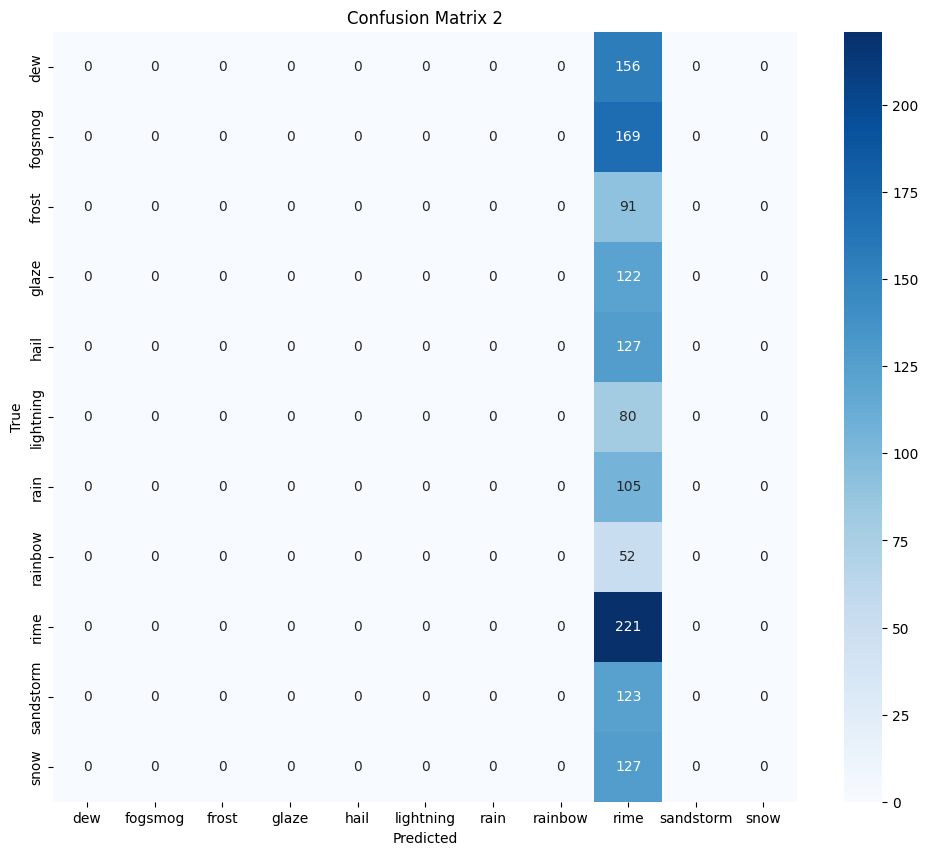

In [19]:

y_pred = model_2.predict(X_test_features)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)


conf_mat = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix 2')
plt.show()

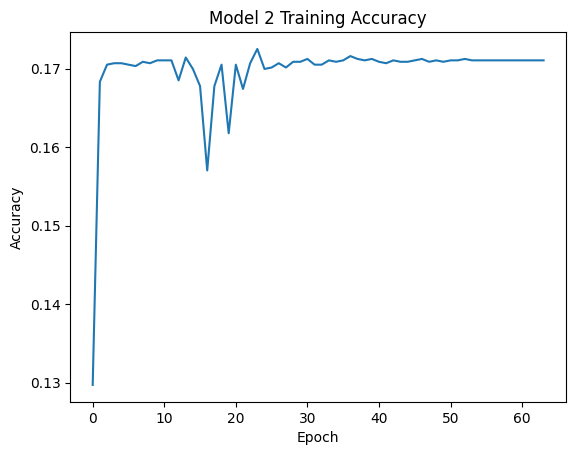

In [16]:

plt.plot(hystory2.history['accuracy'])
plt.title('Model 2 Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


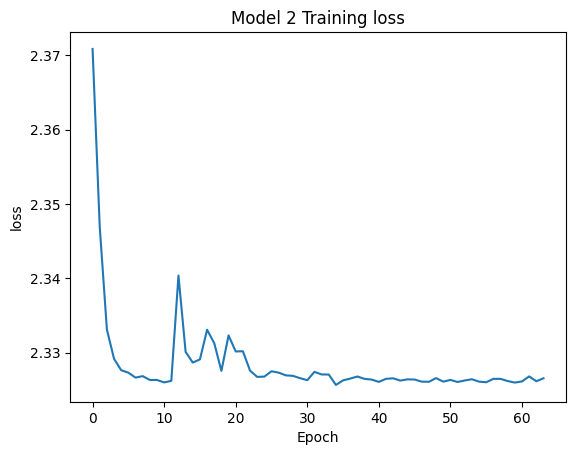

In [18]:
# Plotting the training accuracy
plt.plot(hystory2.history['loss'])
plt.title('Model 2 Training loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()
